### Imports

In [1]:
# Analysis and wrangling.
import pandas as pd
import numpy as np
from unidecode import unidecode
import re

# Graphics libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pd.set_option('display.max_columns', None)

### Loading data / brief analysis.

In [3]:
student_df = pd.read_csv('./data/challenge_MLE.csv', sep=';')

# Transforming epoch to datetime
student_df['fecha_mesa_epoch'] = pd.to_datetime(student_df['fecha_mesa_epoch'], unit='s')
student_df['ass_created_at'] = pd.to_datetime(student_df['ass_created_at'], unit='s')
student_df['ass_due_at'] = pd.to_datetime(student_df['ass_due_at'], unit='s')
student_df['ass_unlock_at'] = pd.to_datetime(student_df['ass_unlock_at'], unit='s')
student_df['ass_lock_at'] = pd.to_datetime(student_df['ass_lock_at'], unit='s')
student_df['s_submitted_at'] = pd.to_datetime(student_df['s_submitted_at'], unit='s')
student_df['s_graded_at'] = pd.to_datetime(student_df['s_graded_at'], unit='s')
student_df['s_created_at'] = pd.to_datetime(student_df['s_created_at'], unit='s')

# Droping duplicates.
student_df.drop_duplicates(inplace=True)

student_df.sample(3)

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,ass_unlock_at,ass_lock_at,points_possible,ass_name_sub,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo
79781,58,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,2f937c4d-9971-4a0a-a75c-8016228dc368,315d9355-3583-4e8a-8a25-6677140a11d7,Customer-focused multi-state open architecture,393141XGF
75124,47,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,ef290964-32df-4d34-a805-19c6d992cab6,26d69fa4-ad05-4e91-9bba-c617e74e96f7,Cross-platform asynchronous time-frame,558410QZZ
736,24,1-2022,8.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,2a44b973-37d2-4972-9cd8-b45e00dcb263,2fa48a40-a5f0-4c61-824a-3d66a0baf2f2,Fully-configurable contextually-based Graphica...,159129TXF


In [4]:
# Getting to know df.
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194394 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   particion           194394 non-null  int64         
 1   periodo             194394 non-null  object        
 2   nota_final_materia  194394 non-null  float64       
 3   fecha_mesa_epoch    7010 non-null    datetime64[ns]
 4   nombre_examen       7010 non-null    object        
 5   nota_parcial        7010 non-null    float64       
 6   assignment_id       25807 non-null   float64       
 7   ass_name            25807 non-null   object        
 8   ass_created_at      25807 non-null   datetime64[ns]
 9   ass_due_at          25807 non-null   datetime64[ns]
 10  ass_unlock_at       24529 non-null   datetime64[ns]
 11  ass_lock_at         25726 non-null   datetime64[ns]
 12  points_possible     25807 non-null   float64       
 13  ass_name_sub        23993 non

In [5]:
# Checking nulls.
pd.DataFrame([student_df.isnull().sum(), (student_df.isnull().sum() / student_df.shape[0] * 100).round(2)]).T

,0,1
particion,0.0,0.00
periodo,0.0,0.00
nota_final_materia,0.0,0.00
fecha_mesa_epoch,187384.0,96.39
nombre_examen,187384.0,96.39
nota_parcial,187384.0,96.39
assignment_id,168587.0,86.72
ass_name,168587.0,86.72
ass_created_at,168587.0,86.72
ass_due_at,168587.0,86.72


# Analyzing data.

<AxesSubplot:>

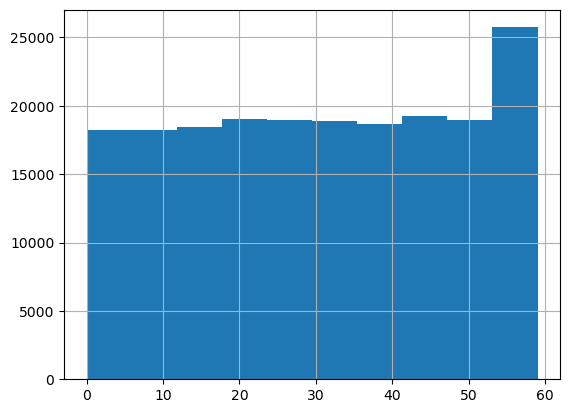

In [6]:
# Checking the time partition.
student_df['particion'].hist()

In [7]:
# Arranging time column.
student_df['periodo'] = student_df['periodo'].str.replace('01', '1')

# Checking the time partition.
student_df['periodo'].value_counts()

1-2022    193854
2-2022       540
Name: periodo, dtype: int64

<AxesSubplot:>

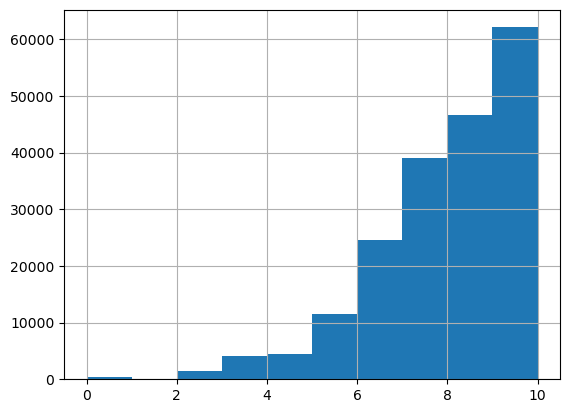

In [8]:
student_df['nota_final_materia'].hist()

In [9]:
student_df['user_uuid'].value_counts()
# the min value for each user is 60, this means each user has a different time partition.
# there are 600 students.

518e8c5f-6632-450b-bcee-518807ff2e9f    1017
ded91bdd-7998-4502-b2cb-9b0081eb3464     824
f2dbd20e-13f8-4d5c-b4ee-70b5ed837d5a     757
6f171fde-7fb3-48e3-b5c0-e89c23631f1a     751
e536d715-fb7a-4e0b-8ac8-bb48a4e39c49     744
                                        ... 
59db8682-a866-4f35-97d1-fbebd7675088      60
8b4d4ea7-664d-473c-8f6c-280744e645d4      60
df99c926-9a5c-495a-803b-fe1c94743cbb      60
35bf6215-6f70-43f2-afd8-e668e5735347      60
ed4e3e5e-5c10-4187-91f7-82114442b119      60
Name: user_uuid, Length: 600, dtype: int64

In [10]:
student_df['legajo'].value_counts()
# There are 601 students id, this number doesnt correspond by 1 from the amount of students i've obtained above.

624097JCN    1017
614851WSA     824
694137GRI     757
372740JAI     751
210665AGT     744
             ... 
517004GYP      60
715923CNS      60
763896XAM      60
890983ESM      60
263794IKM      60
Name: legajo, Length: 601, dtype: int64

In [11]:
repeated_student = student_df.value_counts(['user_uuid','legajo']).reset_index()
repeated_student['user_uuid'].value_counts()[:5]

9d0a3bf7-7efc-405f-bd96-60d75f6033b4    2
518e8c5f-6632-450b-bcee-518807ff2e9f    1
213ae9fc-8a0e-4f6e-ac45-522587f41c33    1
598e46d0-4067-4017-85bd-d50240ff5dd7    1
3c42f7c2-26c0-4b2f-a461-8a87431fb249    1
Name: user_uuid, dtype: int64

In [12]:
# Checking the user_uuid 
mask = student_df['user_uuid'] == '9d0a3bf7-7efc-405f-bd96-60d75f6033b4'
student_df.loc[mask, ['legajo', 'user_uuid']].drop_duplicates()

,legajo,user_uuid
42752,078920YCB,9d0a3bf7-7efc-405f-bd96-60d75f6033b4
96876,772439OKZ,9d0a3bf7-7efc-405f-bd96-60d75f6033b4


In [13]:
student_df['course_uuid'].value_counts()
# the min value for each course is 60, this means each user has a different time partition.
# there are 582 courses id.

2b274b15-83bb-4629-941e-fdc573af4e0b    11439
c78af3b4-4574-4a82-8c41-45195ce43384    10206
12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e     4489
0034afe6-e996-4c26-b0b9-24dbb9535465     3864
68005d22-90dc-42f6-b90a-409714481cbc     3537
                                        ...  
c7608367-bb39-4722-9270-c93058669c2b       60
c68a3c33-51e2-4dd0-9536-2288eca94fe5       60
132ed50b-ec8b-4ad1-973d-f02eab433a34       60
aef3ac91-4ee5-4f4e-a7cf-620094fa81dc       60
dc53bcc5-440d-4bab-93c7-a749c9eddd85       60
Name: course_uuid, Length: 582, dtype: int64

In [14]:
student_df['course_name'].value_counts()
# there are 561 courses names, this doesnt correspond to the amount of curses uuid i've obtained above.

Intuitive non-volatile ability                11439
Object-based leadingedge help-desk            10206
Face-to-face regional concept                  4489
Stand-alone upward-trending secured line       4129
Total radical adapter                          3537
                                              ...  
Monitored regional artificial intelligence       60
Grass-roots national middleware                  60
Multi-channeled homogeneous policy               60
Operative fresh-thinking knowledge user          60
Operative systematic help-desk                   60
Name: course_name, Length: 561, dtype: int64

From this little analysis i got that the information in this data set is segregated in different levels. Each row is a unique interaction or activity.

So the goal will be to analyze the different variables and try to generate other useful variables from them.

One thing to do before is to check the difference between the amounts of course_uuid / course_name and user_uuid / legajo

In [15]:
repeated_course_name = student_df.value_counts(['course_uuid','course_name']).reset_index()
repeated_course_name['course_name'].value_counts()[0:20]

Monitored fault-tolerant Graphical User Interface    5
Profound eco-centric installation                    3
Customer-focused multi-state open architecture       2
Ergonomic needs-based support                        2
Optional exuding alliance                            2
Phased composite orchestration                       2
Quality-focused leadingedge budgetary management     2
Down-sized 24hour migration                          2
Enhanced coherent conglomeration                     2
Function-based systemic info-mediaries               2
Proactive fresh-thinking project                     2
Customer-focused optimizing attitude                 2
Cloned radical algorithm                             2
Quality-focused systemic software                    2
Implemented methodical function                      2
Stand-alone upward-trending secured line             2
Optimized object-oriented challenge                  2
Optional foreground complexity                       1
Operative 

In [16]:
# Checking the course name with the biggest amount of uuid.
mask = student_df['course_name'] == 'Monitored fault-tolerant Graphical User Interface'
student_df.loc[mask, ['course_name', 'course_uuid']].drop_duplicates()

,course_name,course_uuid
6452,Monitored fault-tolerant Graphical User Interface,e2bf69a2-b722-427e-9dab-b03fd2c42e58
26311,Monitored fault-tolerant Graphical User Interface,d0e5e02d-0b17-46f5-9693-2040a606b858
95977,Monitored fault-tolerant Graphical User Interface,52fb613c-3227-41da-b2ca-9533318477a0
164967,Monitored fault-tolerant Graphical User Interface,5d589b98-5da6-46bf-b43d-a6f174834c51
183738,Monitored fault-tolerant Graphical User Interface,2a2a2207-20fc-46a8-aaf2-2d5af284ad38


In [17]:
student_df['nombre_examen'].value_counts()

SEGUNDO PARCIAL(20)                  3213
PRIMER PARCIAL(20)                   3067
INTEGRADOR(30)                        356
RECUPERATORIO PRIMER PARCIAL(20)      242
RECUPERATORIO SEGUNDO PARCIAL(20)     132
Name: nombre_examen, dtype: int64

In [18]:
# Eliminating white spaces at the begging and end of the string.
student_df['ass_name'] = student_df['ass_name'].str.strip()
# Replacing double spaces with single.
student_df['ass_name'] = student_df['ass_name'].str.replace('  ', ' ')
# Bringing all text to lower case.
student_df['ass_name'] = student_df['ass_name'].str.lower()
# Removing ticks from strings.
def remove_ticks(txt):
    if pd.notnull(txt):
        return unidecode(txt)
    else:
        return txt
    
student_df['ass_name'] = student_df['ass_name'].apply(remove_ticks)

student_df['ass_name'].value_counts()

trabajo practico 2 [tp2]                                                         3256
actividad practica integradora 4 [api4]                                          3236
trabajo practico 1 [tp1]                                                         3171
actividad practica integradora 1 [api1]                                          3001
actividad practica integradora 3 [api3]                                          2948
actividad practica integradora 2 [api2]                                          2942
trabajo practico 3 [tp3]                                                         2656
trabajo practico 4 [tp4]                                                         2577
trabajo practico 3 - diagnostico [ed3]                                            580
trabajo practico 4 - diagnostico [ed4]                                            580
la alienacion segun marx                                                           81
actividad practica integradora [api2]                 

In [19]:
# Eliminating white spaces at the begging and end of the string.
student_df['ass_name_sub'] = student_df['ass_name_sub'].str.strip()
# Replacing double spaces with single.
student_df['ass_name_sub'] = student_df['ass_name_sub'].str.replace('  ', ' ')
# Bringing all text to lower case.
student_df['ass_name_sub'] = student_df['ass_name_sub'].str.lower()
    
student_df['ass_name_sub'] = student_df['ass_name_sub'].apply(remove_ticks)

student_df['ass_name_sub'].value_counts()

trabajo practico 2 [tp2]                     2913
trabajo practico 1 [tp1]                     2818
actividad practica integradora 1 [api1]      2619
actividad practica integradora 2 [api2]      2569
actividad practica integradora 3 [api3]      2521
                                             ... 
entregable grupal 2                             1
autoevaluacion de la actividad practica 4       1
examen de suficiencia                           1
actividad practica 4                            1
entregable grupal 4                             1
Name: ass_name_sub, Length: 79, dtype: int64

In [20]:
student_df['submission_type'].value_counts()

external_tool        10104
online_quiz           9926
online_upload         3153
basic_lti_launch       738
discussion_topic        50
online_text_entry       20
media_recording          2
Name: submission_type, dtype: int64

# Data Wrangling.

im going top start by creating a unique variable that im going to use as index, by using the features user_uuid/course_uuid.

In [21]:
student_df['index'] = student_df['user_uuid'] + '/' + student_df['course_uuid']

In [22]:
# Amount of unique formed indexes.
len(student_df['index'].unique())

2969

In [23]:
# Creating a new DF in which im going to concatenate the created features.
data = student_df.groupby(['index', 'nota_final_materia', 'periodo']).size().reset_index()[['index', 'nota_final_materia', 'periodo']]

data.index = data['index'].values
data.drop(columns='index', inplace=True)

print(f'Shape = {data.shape[0]} rows / {data.shape[1]} cols')
data.sample(2)

Shape = 2969 rows / 2 cols


,nota_final_materia,periodo
bd467182-8d5a-4519-8db8-2b137b4c4f6d/7accaa21-b42f-443b-915c-6c2d5ee6d95c,0.0,1-2022
5e5b2987-e6b4-4882-91ec-0eba3d95d701/bb186d37-9048-43f2-8f3d-1dcc8a87c4f3,9.0,1-2022


## Assignments.
### Appending information about assignments.

Im going to append to the created DF the information about differents assignments students have to do during the course.

I've seen that a lot of assignments in the column 'ass_name' share the abbreviated name and number of the homework, like:
* [tp1]
* [tp2]
* [api1]
* etc.

Ill try to separate that logic and create a column indicating the homework each student did.

In [24]:
# First ill need to bring all different assignments to same type.
# Im going to use regex.
pattern =r"\[(\w+)\]"
pattern_re = re.compile(pattern)

# This function will be applied with .apply(lambda) it will return the 1st 
# element that match the given pattern.
def extract_assessment_type (text):
    if pd.isnull(text):
        return np.nan
    
    pattern_search = pattern_re.search(text)
    # return pattern_search.group(1) if pattern_search else text
    return pattern_search.group(1) if pattern_search else text

In [25]:
# Im going to separate between assignments that were assigned and were submitted.
student_df['assigned_ass'] = student_df['ass_name'].copy()
student_df['submitted_ass'] = student_df['ass_name_sub'].copy()

# Obtaining assignments types.
student_df['assigned_ass'] = student_df['ass_name'].apply(lambda x: extract_assessment_type(x))
student_df['submitted_ass'] = student_df['ass_name_sub'].apply(lambda x: extract_assessment_type(x))

In [26]:
student_df['assigned_ass'].value_counts()

tp2                                                                              3331
api4                                                                             3325
tp1                                                                              3271
api1                                                                             3076
api3                                                                             3024
api2                                                                             3018
tp3                                                                              2776
tp4                                                                              2702
ed4                                                                               580
ed3                                                                               580
la alienacion segun marx                                                           81
foro: "evaluacion de pares"                           

In [27]:
student_df['submitted_ass'].value_counts()

tp2                      2981
tp1                      2903
tp3                      2861
api1                     2686
api2                     2631
                         ... 
examen de suficiencia       1
entregable grupal 1         1
entregable grupal 2         1
entregable grupal 3         1
entregable grupal 4         1
Name: submitted_ass, Length: 62, dtype: int64

Based on the leftovers:
* for the case of assigned assessments im going to keep those assessments that are important, like 'TPs', 'APIs' and 'EDs'.
* As for submitted assignments im going to gather the remains into a single category 'otras_entregas'.

Im doing this because the remaining assignments are not that many, and the name of them doesnt appear to imply importance.

Th only assignment im going to drop from 'ass_name_sub' is 'evaluacion diagnostica' because that is usually an important assessment.

In [28]:
student_df['submitted_ass'] = student_df['submitted_ass'].replace('evaluacion diagnostica', np.nan)

In [29]:
assignments_names = ['api1', 'api2', 'api3', 'api4', 'ed3', 'ed4', 'tp1', 'tp2', 'tp3', 'tp4']

# First im going to ignore all assigned assessments that are not in the list.
mask_assigned_tps = ~student_df['assigned_ass'].isin(assignments_names) & student_df['assigned_ass'].notnull()
student_df.loc[mask_assigned_tps, 'assigned_ass'] = np.nan

# Now im going to replace assignments that has no relevant importance and assigned to a single category.
mask_submitted_tps = ~student_df['submitted_ass'].isin(assignments_names) & student_df['submitted_ass'].notnull()
student_df.loc[mask_submitted_tps, 'submitted_ass'] = 'otros_trabajos'

### Obtaining assignments for each student

In [30]:
# Appending course information to my data in order to merge course information.
course_name_df = student_df[['index', 'course_uuid']].copy().drop_duplicates()
data = data.merge(course_name_df, how='left', left_index=True, right_index=False, right_on='index')
data.index = data['index'].values
data.drop(columns='index', inplace=True)

In [31]:
# Assignments to consider. 
assessment_cols = student_df.loc[student_df['submitted_ass'].notnull(), 'submitted_ass'].unique()

# Defining a function to flag assignments that dont belong to a course.
def flag_unrequited_assignments(df, submit_time=False):
    # Unique assignments for each course.
    unique_assignments_per_course = student_df[student_df['submitted_ass'].notnull()].groupby('course_uuid')['submitted_ass'].unique()
    
    for assignment in assessment_cols: # --> ['api1', 'tp1', 'api2', 'api4', 'tp2', 'api3', 'tp4', 'tp3', 'otros_trabajos', 'ed3', 'ed4']
    # Iterating over possible assignments that a course can have.
    # This element is an series that each row is a unique course with possible assignments a course can have.
    # For example.
    # ---
    # 0034afe6-e996-4c26-b0b9-24dbb9535465    [api1, api2, api3, api4, ed4, ed3, tp1, tp2]
    # f08bfeb75-fb35-4ac4-8916-1f7eda676892                           [tp1, tp2, tp3, tp4]
    # ---
        if (submit_time and assignment == 'otros_trabajos'):
            continue
        
        for course_uuid, possible_assignment_list in unique_assignments_per_course.items():
            
            if submit_time:
                col_name = f'{assignment}_time_to_submit[days]'
            else:
                col_name = assignment
                
            # Then if the assignment is not present in possible assignment of the series.
            if assignment not in possible_assignment_list:
                # Keeping considered course.
                mask = df['course_uuid'] == course_uuid
                # And flagging the corresponding assignment column as -1.
                df.loc[mask, col_name] = -1
    
    return df

In [32]:
assignment_df = student_df.groupby(['index', 'submitted_ass']).size().reset_index()

# Creating a pivot table in order to transform the different assignments into columns.
assignment_df = assignment_df.pivot(index='index', columns='submitted_ass', values=0).reset_index().rename_axis(None, axis=1)

# Droping index col, and assigning it as index.
assignment_df.index = assignment_df['index'].values
assignment_df.drop(columns='index', inplace=True)

# Merging information.
data = data.merge(assignment_df, left_index=True, right_index=True, how='left')

# Filling nans with 0, this means that the student has no information about that assessment.
# And transforming type into int for those columns.
for col in assessment_cols:
    data[col] = data[col].fillna(0)
    data[col] = data[col].astype(int)

In [33]:
data = flag_unrequited_assignments(data)
data.sample()

,nota_final_materia,periodo,course_uuid,api1,api2,api3,api4,ed3,ed4,otros_trabajos,tp1,tp2,tp3,tp4
510c32f0-2272-4e49-b934-c95d434690fb/05d6dc50-8170-4368-99b3-1c6336ea21fd,5.0,1-2022,05d6dc50-8170-4368-99b3-1c6336ea21fd,1,1,1,1,-1,-1,-1,1,1,1,1


### Obtaining scores for each assignment submission.

In [34]:
assignment_score_df = student_df.groupby(['index', 'submitted_ass'])['score'].mean().reset_index()
assignment_score_df['submitted_ass'] = assignment_score_df['submitted_ass'] + '_score'

# Creating a pivot table in order to transform the different assignments into columns.
assignment_score_df = assignment_score_df.pivot(index='index', columns='submitted_ass', values='score').reset_index().rename_axis(None, axis=1)

# Droping index col, and assigning it as index.
assignment_score_df.index = assignment_score_df['index'].values
assignment_score_df.drop(columns='index', inplace=True)

# Merging information.
data = data.merge(assignment_score_df, left_index=True, right_index=True, how='left')

# Filling nans with 0, this means that the student has no information about that assessment.
# And transforming type into int for those columns.
for col in assessment_cols:
    name = f'{col}_score'
    data[name] = data[name].fillna(0)
    data[name] = data[name].astype(float)
    data[name] = np.round(data[name],2)

data.sample()

,nota_final_materia,periodo,course_uuid,api1,api2,api3,api4,ed3,ed4,otros_trabajos,tp1,tp2,tp3,tp4,api1_score,api2_score,api3_score,api4_score,ed3_score,ed4_score,otros_trabajos_score,tp1_score,tp2_score,tp3_score,tp4_score
d8876890-352b-4a04-bcc5-067af21ccdd5/68005d22-90dc-42f6-b90a-409714481cbc,9.0,1-2022,68005d22-90dc-42f6-b90a-409714481cbc,1,1,1,1,1,1,0,1,1,1,1,100.0,100.0,100.0,100.0,100.0,90.0,0.0,100.0,100.0,80.0,100.0


### Obtaining required time for a student to finish an assignment.

# First obtaining when each assignment is unlocked for each course.
ass_unlock_df = student_df.groupby(['course_uuid', 'assigned_ass'])['ass_created_at'].first().reset_index()
ass_unlock_df['assigned_ass'] = ass_unlock_df['assigned_ass'] + '_assigned_date'
ass_unlock_df = ass_unlock_df.pivot(index='course_uuid', columns='assigned_ass', values='ass_created_at').reset_index().rename_axis(None,axis=1)

ass_unlock_df.sample()

In [51]:
# First obtaining when each assignment is unlocked for each course.
ass_unlock_df = student_df.groupby(['course_uuid', 'assigned_ass', 'ass_unlock_at']).size().reset_index()
ass_unlock_df['assigned_ass'] = ass_unlock_df['assigned_ass'] + '_assigned_date'
ass_unlock_df = ass_unlock_df.pivot(index='course_uuid', columns='assigned_ass', values='ass_unlock_at').reset_index().rename_axis(None,axis=1)

ass_unlock_df.sample()

,course_uuid,api1_assigned_date,api2_assigned_date,api3_assigned_date,api4_assigned_date,tp1_assigned_date,tp2_assigned_date,tp3_assigned_date,tp4_assigned_date
353,a0382646-55f7-4b71-b216-e1d2f4ffd844,2022-03-21 03:00:00,2022-03-21 03:00:00,2022-03-21 03:00:00,2022-03-21 03:00:00,2022-03-21 03:00:00,2022-03-21 03:00:00,2022-03-21 03:00:00,2022-03-21 03:00:00


In [ ]:
# Since for ed3 and ed4 all values in 'ass_unlock_at' are nulls, im going to impute them using the column 'ass_created_at'
ass_unlock_ed_df = student_df.groupby(['course_uuid', 'assigned_ass', 'ass_created_at']).size().reset_index()

mask_ed3 = ass_unlock_ed_df['assigned_ass'] == 'ed3'
mask_ed4 = ass_unlock_ed_df['assigned_ass'] == 'ed4'
ass_unlock_ed_df = ass_unlock_ed_df[mask_ed3 | mask_ed4]
ass_unlock_ed_df['assigned_ass'] = ass_unlock_ed_df['assigned_ass'] + '_assigned_date'

ass_unlock_ed_df = ass_unlock_ed_df.pivot(index='course_uuid', columns='assigned_ass', values='ass_created_at').reset_index().rename_axis(None,axis=1)
ass_unlock_ed_df.sample()

,course_uuid,ed3_assigned_date,ed4_assigned_date
27,b55dee5f-c905-4d8c-8a2e-b4d72fdd0169,2022-02-25 13:46:09,2022-02-25 13:46:02


In [ ]:
# Merging courses assignments dates
ass_unlock_df = ass_unlock_df.merge(ass_unlock_ed_df, how='left', on='course_uuid')


ass_unlock_df.sample()

,course_uuid,api1_assigned_date,api2_assigned_date,api3_assigned_date,api4_assigned_date,ed3_assigned_date_x,ed4_assigned_date_x,tp1_assigned_date,tp2_assigned_date,tp3_assigned_date,tp4_assigned_date,ed3_assigned_date_y,ed4_assigned_date_y
352,9fb5bf9b-b5e3-40ef-b69e-8681fa52cb8d,2022-02-24 18:48:43,2022-02-24 18:48:44,2022-02-24 18:48:44,2022-02-24 18:48:45,NaT,NaT,2022-02-24 18:48:45,2022-02-24 18:48:45,2022-02-24 18:48:46,2022-02-24 18:48:46,NaT,NaT


In [36]:
# Obtaining the date each student delivered each assignment.
ass_submitted_df = student_df.groupby(['index', 'submitted_ass'])['s_submitted_at'].first().reset_index()
# Ignoring general assignments.
ass_submitted_df = ass_submitted_df[ass_submitted_df['submitted_ass'] != 'otros_trabajos'].copy()
ass_submitted_df['submitted_ass'] = ass_submitted_df['submitted_ass'] + '_submitted_date'
ass_submitted_df = ass_submitted_df.pivot(index='index', values='s_submitted_at', columns='submitted_ass').reset_index().rename_axis(None,axis=1)

ass_submitted_df.index = ass_submitted_df['index'].values
ass_submitted_df.drop(columns='index', inplace=True)

ass_submitted_df.sample()

,api1_submitted_date,api2_submitted_date,api3_submitted_date,api4_submitted_date,ed3_submitted_date,ed4_submitted_date,tp1_submitted_date,tp2_submitted_date,tp3_submitted_date,tp4_submitted_date
5013f8e6-8c5b-4f52-920a-36268204f2d8/41fc218f-a64e-4633-9efd-62ad28943f04,2022-03-24 23:12:51,2022-04-14 14:43:46,2022-04-28 19:20:29,2022-04-28 20:52:37,NaT,NaT,2022-04-10 14:48:46,2022-04-14 15:02:45,2022-05-11 18:28:14,2022-05-11 18:48:54


In [37]:
# Creating a copy to obtain the time.
assignment_submit_time = data[['course_uuid']].copy()

# Merging information.
assignment_submit_time = assignment_submit_time.merge(ass_submitted_df, left_index=True, right_index=True, how='left')
assignment_submit_time['index'] = assignment_submit_time.index.values

assignment_submit_time = assignment_submit_time.merge(ass_unlock_df, how='left', on='course_uuid')

assignment_submit_time.index = assignment_submit_time['index'].values
assignment_submit_time.drop(columns='index', inplace=True)

assignment_submit_time.sample()

,course_uuid,api1_submitted_date,api2_submitted_date,api3_submitted_date,api4_submitted_date,ed3_submitted_date,ed4_submitted_date,tp1_submitted_date,tp2_submitted_date,tp3_submitted_date,tp4_submitted_date,api1_assigned_date,api2_assigned_date,api3_assigned_date,api4_assigned_date,ed3_assigned_date,ed4_assigned_date,tp1_assigned_date,tp2_assigned_date,tp3_assigned_date,tp4_assigned_date
c7b13079-b52a-4b8e-9ffd-3593aa389468/d2acaf58-1dcd-4f92-8104-8d3b363cb3b9,d2acaf58-1dcd-4f92-8104-8d3b363cb3b9,2022-03-24 20:33:40,2022-04-05 13:29:32,2022-04-17 12:29:42,2022-04-22 23:07:03,NaT,NaT,2022-04-15 13:26:19,2022-04-15 14:27:00,2022-04-19 19:30:13,2022-04-23 23:33:26,2022-02-25 13:48:08,2022-02-25 13:48:08,2022-02-25 13:48:08,2022-02-25 13:48:09,NaT,NaT,2022-02-25 13:48:03,2022-02-25 13:48:02,2022-02-25 13:48:01,2022-02-25 13:48:00


In [38]:
submit_time_cols = []
# Obtaining time intervals.
for col in assessment_cols:
    if col == 'otros_trabajos':
        continue
    
    assigned_date = f'{col}_assigned_date'
    submitted_date = f'{col}_submitted_date'
    
    time_delta_col_name = f'{col}_time_to_submit[days]'
    submit_time_cols.append(time_delta_col_name)
    
    time_delta_serie = assignment_submit_time[submitted_date] - assignment_submit_time[assigned_date]
    assignment_submit_time[time_delta_col_name]  = np.round(time_delta_serie.dt.total_seconds() / ( 3600 * 24 ),1) # Convert to days

# Doing this just for keeping the course_uuid.
submit_time_cols.insert(0,'course_uuid')

assignment_submit_time = assignment_submit_time[submit_time_cols]
submit_time_cols.remove('course_uuid')

assignment_submit_time.sample()

,course_uuid,api1_time_to_submit[days],tp1_time_to_submit[days],api2_time_to_submit[days],api4_time_to_submit[days],tp2_time_to_submit[days],api3_time_to_submit[days],tp4_time_to_submit[days],tp3_time_to_submit[days],ed3_time_to_submit[days],ed4_time_to_submit[days]
ef290964-32df-4d34-a805-19c6d992cab6/1a0a5d99-92ff-4a0e-8f76-ff60cb914cec,1a0a5d99-92ff-4a0e-8f76-ff60cb914cec,33.6,37.4,33.6,33.6,37.3,33.6,37.4,37.4,NaN,NaN


In [551]:
# Going to flag those assignments that doesnt correspond to a given course.
assignment_submit_time = flag_unrequited_assignments(assignment_submit_time, submit_time=True)
# Filling leftovers with 0, in order to identify those assignments that dont have a submitted date.
assignment_submit_time.fillna(0, inplace=True)
# Droping to merge.
assignment_submit_time.drop(columns='course_uuid', inplace=True)


In [552]:
# Merging information
data = data.merge(assignment_submit_time, left_index=True, right_index=True, how='left')

### Obtaining submission types for each student.

In [553]:
submission_type_df = student_df.groupby(['index', 'submission_type']).size().reset_index()
submission_type_df = submission_type_df.pivot(index='index', columns='submission_type', values=0).reset_index().rename_axis(None, axis=1)

# Droping index col, and assigning it as index.
submission_type_df.index = submission_type_df['index'].values
submission_type_df.drop(columns='index', inplace=True)

# Obtaining column name.
submission_type_cols = submission_type_df.columns.to_list()

data = data.merge(submission_type_df, left_index=True, right_index=True, how= 'left')

for col in submission_type_cols:
    data[col] = data[col].fillna(0)
    data[col] = data[col].astype(int)
    
    rename = {col : f'{col}_submits'}
    data.rename(columns=rename, inplace=True)

data.sample()

,nota_final_materia,periodo,course_uuid,api1,api2,api3,api4,ed3,ed4,otros_trabajos,tp1,tp2,tp3,tp4,api1_score,api2_score,api3_score,api4_score,ed3_score,ed4_score,otros_trabajos_score,tp1_score,tp2_score,tp3_score,tp4_score,api1_time_to_submit[days],tp1_time_to_submit[days],api2_time_to_submit[days],api4_time_to_submit[days],tp2_time_to_submit[days],api3_time_to_submit[days],tp4_time_to_submit[days],tp3_time_to_submit[days],ed3_time_to_submit[days],ed4_time_to_submit[days],basic_lti_launch_submits,discussion_topic_submits,external_tool_submits,media_recording_submits,online_quiz_submits,online_text_entry_submits,online_upload_submits
8fef585f-cd05-4fee-bb3a-089b96645366/0afc9057-0824-49bf-bdf0-fc0544906825,10.0,1-2022,0afc9057-0824-49bf-bdf0-fc0544906825,1,1,1,1,-1,-1,-1,1,1,1,1,71.4,100.0,100.0,100.0,0.0,0.0,0.0,70.0,100.0,100.0,100.0,5.7,6.8,6.9,18.5,7.7,13.8,18.7,21.4,-1.0,-1.0,0,0,4,0,0,0,4


### Apending exams information

In [554]:
exams_df = student_df.groupby(['index', 'nombre_examen'])['nota_parcial'].mean().reset_index()
exams_df['nombre_examen'] = exams_df['nombre_examen'].str.lower()
exams_df['nombre_examen'] = exams_df['nombre_examen'].str.replace(r'\(\d+\)', '', regex=True)
exams_df['nombre_examen'] = exams_df['nombre_examen'].str.replace(' ', '_')
exams_df = exams_df.pivot(index='index', values='nota_parcial', columns='nombre_examen').reset_index().rename_axis(None, axis=1)

In [555]:
# Obtaining information about the 'evaluacion diagnositca' that i ignore when dealing with the columns 'ass_name_sub'.
diagnostic_exams_df = student_df.loc[student_df['ass_name_sub'] == 'evaluacion diagnostica', ['index', 'ass_name_sub', 'score']]
diagnostic_exams_df = diagnostic_exams_df.groupby(['index', 'ass_name_sub', 'score']).mean().reset_index()
diagnostic_exams_df['ass_name_sub'] = diagnostic_exams_df['ass_name_sub'].str.replace(' ', '_')
diagnostic_exams_df = diagnostic_exams_df.pivot(index='index', values='score', columns='ass_name_sub').reset_index().rename_axis(None, axis=1)

In [556]:
# Merging information
exams_df = exams_df.merge(diagnostic_exams_df, how='left', on='index')

# Droping index col, and assigning it as index.
exams_df.index = exams_df['index'].values
exams_df.drop(columns='index', inplace=True)

# Obtaining column name.
exams_col = exams_df.columns.to_list()

data = data.merge(exams_df, left_index=True, right_index=True, how= 'left')

for col in exams_col:
    if col != 'evaluacion_diagnostia':
        data[col] = data[col].fillna(-1)
        data[col] = data[col].astype(int)
    else:
        data[col] = data[col].fillna(-1)
        data[col] = data[col].astype(float)
        data[col] = np.round(data[col],2)

data.sample(1)

,nota_final_materia,periodo,course_uuid,api1,api2,api3,api4,ed3,ed4,otros_trabajos,tp1,tp2,tp3,tp4,api1_score,api2_score,api3_score,api4_score,ed3_score,ed4_score,otros_trabajos_score,tp1_score,tp2_score,tp3_score,tp4_score,api1_time_to_submit[days],tp1_time_to_submit[days],api2_time_to_submit[days],api4_time_to_submit[days],tp2_time_to_submit[days],api3_time_to_submit[days],tp4_time_to_submit[days],tp3_time_to_submit[days],ed3_time_to_submit[days],ed4_time_to_submit[days],basic_lti_launch_submits,discussion_topic_submits,external_tool_submits,media_recording_submits,online_quiz_submits,online_text_entry_submits,online_upload_submits,integrador,primer_parcial,recuperatorio_primer_parcial,recuperatorio_segundo_parcial,segundo_parcial,evaluacion_diagnostica
8c0e9429-9f08-46c1-b3b1-965dcfdb7ac5/c78af3b4-4574-4a82-8c41-45195ce43384,9.0,1-2022,c78af3b4-4574-4a82-8c41-45195ce43384,1,1,1,1,-1,-1,0,1,1,1,1,80.0,100.0,100.0,80.0,0.0,0.0,0.0,45.0,90.0,61.67,62.5,4.6,4.6,11.7,39.5,11.7,39.5,39.6,39.6,-1.0,-1.0,0,0,4,0,4,0,0,-1,9,-1,-1,9,-1


### Rearranging

In [557]:
# Defining if the course has been approved or not.
data['materia_aprobada'] = data['nota_final_materia'].apply(lambda x: 1 if x > 4 else 0)

In [558]:
# Concatenating different assessments the word '_score' in order to obtain the name of the score columns.
score_cols = (assessment_cols + '_score').tolist()

# Appending the score columns to the assessment columns
columns_order = assessment_cols.tolist() + score_cols
# Appending time to submit cols.
columns_order = columns_order + submit_time_cols

# Sorting alphabetically
columns_order.sort()

# Appending submissions types.
columns_order = columns_order + (pd.Series(submission_type_cols) + '_submits').tolist()

# Appending exams columns.
columns_order = exams_col + columns_order

columns_order.insert(0, 'materia_aprobada')
columns_order.insert(1, 'nota_final_materia')
columns_order.insert(2, 'periodo')

data = data[columns_order].copy()

There are some students that have no information about exams, im going to drop those students from my DF, because they could worsen the model performance. 

In [559]:
mask = (
    (data['integrador'] == -1) &
    (data['primer_parcial'] == -1) &
    (data['recuperatorio_primer_parcial'] == -1) &
    (data['recuperatorio_segundo_parcial'] == -1) &
    (data['segundo_parcial'] == -1) &
    (data['evaluacion_diagnostica'] == -1 )
)

data[mask]

,materia_aprobada,nota_final_materia,periodo,integrador,primer_parcial,recuperatorio_primer_parcial,recuperatorio_segundo_parcial,segundo_parcial,evaluacion_diagnostica,api1,api1_score,api1_time_to_submit[days],api2,api2_score,api2_time_to_submit[days],api3,api3_score,api3_time_to_submit[days],api4,api4_score,api4_time_to_submit[days],ed3,ed3_score,ed3_time_to_submit[days],ed4,ed4_score,ed4_time_to_submit[days],otros_trabajos,otros_trabajos_score,tp1,tp1_score,tp1_time_to_submit[days],tp2,tp2_score,tp2_time_to_submit[days],tp3,tp3_score,tp3_time_to_submit[days],tp4,tp4_score,tp4_time_to_submit[days],basic_lti_launch_submits,discussion_topic_submits,external_tool_submits,media_recording_submits,online_quiz_submits,online_text_entry_submits,online_upload_submits
01103370-3046-4bc0-a8f8-85858ec0ec88/e1b3a8df-6ed2-45b9-b623-58037efe9b98,1,10.0,1-2022,-1,-1,-1,-1,-1,-1,1,100.0,18.7,1,100.0,18.7,1,100.0,18.7,1,100.0,18.7,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1,0.00,-1.0,-1,0.0,-1.0,-1,0.00,-1.0,-1,0.0,-1.0,0,0,4,0,0,0,0
01193bc4-6b73-4fab-9a63-e425a2e397dd/e3552daa-ae9a-4f97-9ea1-401fc4d02230,1,10.0,1-2022,-1,-1,-1,-1,-1,-1,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,1,100.0,2,100.00,48.7,2,95.0,48.7,1,100.00,72.5,1,100.0,104.9,0,0,0,0,2,1,4
04ad5b31-4753-4c60-b413-38541c305811/6b3c1545-e5b5-437c-8858-547d57f0cb74,1,9.0,2-2022,-1,-1,-1,-1,-1,-1,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,1,100.00,32.4,1,100.0,55.5,-1,0.00,-1.0,-1,0.0,-1.0,0,0,0,0,0,0,2
070ea2b0-8af8-4cb6-b11d-538328dc2fe1/e1b3a8df-6ed2-45b9-b623-58037efe9b98,1,9.0,1-2022,-1,-1,-1,-1,-1,-1,1,100.0,13.5,1,82.4,13.5,1,76.9,39.6,1,100.0,52.0,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,-1,0.00,-1.0,-1,0.0,-1.0,-1,0.00,-1.0,-1,0.0,-1.0,0,0,4,0,0,0,0
09489c7c-85de-4095-a9d6-8c1d236fa722/e52c1378-494c-4e81-9949-8beff2175482,0,3.0,1-2022,-1,-1,-1,-1,-1,-1,0,0.0,0.0,1,100.0,11.9,1,100.0,11.9,1,100.0,11.9,1,70.0,31.1,1,90.0,34.2,0,0.0,1,76.67,11.9,1,77.5,24.9,1,76.67,0.0,1,90.0,0.0,0,0,3,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fa970257-835b-449f-a299-d7651d983e2d/689484fc-8bad-47f0-9940-9d8c229c723f,1,8.0,1-2022,-1,-1,-1,-1,-1,-1,1,100.0,1.4,1,100.0,2.4,1,100.0,17.5,1,100.0,35.5,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,1,100.00,21.5,1,90.0,57.0,1,50.00,77.8,1,50.0,102.8,0,0,4,0,0,0,4
fa970257-835b-449f-a299-d7651d983e2d/7accaa21-b42f-443b-915c-6c2d5ee6d95c,1,6.0,1-2022,-1,-1,-1,-1,-1,-1,1,100.0,0.5,1,100.0,0.5,1,100.0,16.5,1,100.0,16.5,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,1,25.00,15.5,1,80.0,54.8,1,90.00,77.6,1,90.0,102.9,0,0,4,0,0,0,4
fa970257-835b-449f-a299-d7651d983e2d/d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,1,7.0,1-2022,-1,-1,-1,-1,-1,-1,1,100.0,2.5,1,100.0,3.4,1,87.5,14.5,1,86.7,14.5,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,1,90.00,8.5,0,0.0,0.0,2,95.00,35.4,2,85.0,35.5,0,0,4,0,0,0,5
fa970257-835b-449f-a299-d7651d983e2d/dbc3d0fb-7070-4a93-96b3-a380d8d7da57,1,7.0,1-2022,-1,-1,-1,-1,-1,-1,1,100.0,-16.6,1,100.0,0.5,1,100.0,15.5,1,100.0,15.6,-1,0.0,-1.0,-1,0.0,-1.0,-1,0.0,1,100.00,17.6,1,100.0,50.7,1,100.00,76.0,1,90.0,98.5,0,0,4,0,0,0,4


In [109]:
data = data[~mask].copy()
data.drop(columns='nota_final_materia', inplace=True)

# Draft

In [110]:
# Define conditions for aggregation based on null values in columns
conditions_null_assignment = (
    student_df['assignment_id'].isnull()
    & student_df['ass_name'].isnull()
    & student_df['ass_created_at'].isnull()
    & student_df['ass_due_at'].isnull()
    & student_df['ass_unlock_at'].isnull()
    & student_df['ass_lock_at'].isnull()
    & student_df['points_possible'].isnull()
    & student_df['ass_name_sub'].notnull()
    & student_df['sub_uuid'].notnull()
    & student_df['score'].notnull()
    & student_df['submission_type'].notnull()
    & student_df['s_submitted_at'].notnull()
    & student_df['s_graded_at'].notnull()
    & student_df['s_created_at'].notnull()
)

student_df[conditions_null_assignment]

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,ass_unlock_at,ass_lock_at,points_possible,ass_name_sub,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo,index,assigned_ass,submitted_ass
15,15,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,actividad practica integradora 1 [api1],ef6fc92b-98da-40de-b440-1990379ee5e1,100.0,external_tool,2022-04-03 03:19:59,2022-04-03 03:29:45,2022-08-01 22:27:07,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,13df535e-065c-4593-98ea-5b1e29015b7d/09614210-...,NaN,api1
80,17,1-2022,5.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,actividad practica integradora 1 [api1],29c985c1-7905-40e7-b9a8-80303fff3162,75.0,external_tool,2022-03-25 22:10:08,2022-03-25 22:24:08,2022-08-01 22:27:07,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5,14d11dfe-01d7-4c8a-8489-59cce7e2d051,Switchable radical service-desk,730281VXM,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5/14d11dfe-...,NaN,api1
81,18,1-2022,5.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,actividad practica integradora 3 [api3],4734626a-8b86-4684-b974-844e340d59b1,100.0,external_tool,2022-03-26 14:22:21,2022-04-18 14:43:00,2022-08-01 22:27:07,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5,14d11dfe-01d7-4c8a-8489-59cce7e2d051,Switchable radical service-desk,730281VXM,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5/14d11dfe-...,NaN,api3
82,19,1-2022,5.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,trabajo practico 1 [tp1],98a89782-c433-4ae2-a561-49b49e6847e8,60.0,online_quiz,2022-03-28 22:21:38,2022-03-28 22:21:38,2022-08-01 22:27:07,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5,14d11dfe-01d7-4c8a-8489-59cce7e2d051,Switchable radical service-desk,730281VXM,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5/14d11dfe-...,NaN,tp1
91,28,1-2022,5.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,actividad practica integradora 2 [api2],ced49574-3200-4256-82db-01faf9f36d55,100.0,external_tool,2022-04-12 21:57:42,2022-04-12 21:59:02,2022-08-01 22:27:07,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5,14d11dfe-01d7-4c8a-8489-59cce7e2d051,Switchable radical service-desk,730281VXM,8289fbcb-a999-4b5b-8d7e-a4ea0fe477d5/14d11dfe-...,NaN,api2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196066,4,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,actividad practica integradora 3 [api3],c72d465f-3571-43dc-8cd9-84c563626b6a,87.5,external_tool,2022-03-22 00:51:51,2022-03-22 00:56:58,2022-08-01 22:27:07,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,NaN,api3
196067,4,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,actividad practica integradora 2 [api2],f800f50f-03a6-4f42-859b-f6d9f7f6e2fc,100.0,external_tool,2022-03-22 00:49:43,2022-03-22 00:50:58,2022-08-01 22:27:07,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,NaN,api2
196077,14,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,trabajo practico 1 [tp1],0cedd540-a361-4513-b47c-61f73c6a2b5d,50.0,online_upload,2022-04-04 23:27:09,2022-04-14 13:19:12,2022-08-01 22:27:07,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,NaN,tp1
196091,28,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaN,trabajo practico 3 [tp3],fde8ccda-d042-4907-a096-698c41963059,90.0,online_upload,2022-04-23 14:16:49,2022-05-02 20:44:37,2022-08-01 22:27:07,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,NaN,tp3


In [116]:
# Define conditions for aggregation based on null values in columns
conditions_null_assignment = (
    student_df['assignment_id'].notnull()
    & student_df['ass_name'].notnull()
    & student_df['ass_created_at'].notnull()
    & student_df['ass_due_at'].notnull()
    & student_df['ass_unlock_at'].notnull()
    & student_df['ass_lock_at'].notnull()
    & student_df['points_possible'].notnull()
    & student_df['ass_name_sub'].isnull()
    & student_df['sub_uuid'].isnull()
    & student_df['score'].isnull()
    & student_df['submission_type'].isnull()
    & student_df['s_submitted_at'].isnull()
    & student_df['s_graded_at'].isnull()
    & student_df['s_created_at'].isnull()
)

student_df[conditions_null_assignment]

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,ass_unlock_at,ass_lock_at,points_possible,ass_name_sub,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo,index,assigned_ass,submitted_ass
18,18,1-2022,9.0,NaT,NaN,NaN,195289.0,actividad practica integradora 1 [api1],2022-02-24 18:45:59,2022-04-11 02:59:59,2022-03-21 03:00:00,2022-04-11 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,13df535e-065c-4593-98ea-5b1e29015b7d/09614210-...,api1,NaN
25,24,1-2022,9.0,NaT,NaN,NaN,195290.0,actividad practica integradora 2 [api2],2022-02-24 18:45:59,2022-04-25 02:59:59,2022-03-21 03:00:00,2022-04-25 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,13df535e-065c-4593-98ea-5b1e29015b7d/09614210-...,api2,NaN
41,38,1-2022,9.0,2022-05-31,SEGUNDO PARCIAL(20),10.0,195291.0,actividad practica integradora 3 [api3],2022-02-24 18:45:59,2022-05-30 02:59:59,2022-03-21 03:00:00,2022-05-30 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,13df535e-065c-4593-98ea-5b1e29015b7d/09614210-...,api3,NaN
44,41,1-2022,9.0,NaT,NaN,NaN,195295.0,trabajo practico 3 [tp3],2022-02-24 18:46:01,2022-06-07 02:59:59,2022-03-21 03:00:00,2022-06-07 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,13df535e-065c-4593-98ea-5b1e29015b7d/09614210-...,tp3,NaN
52,49,1-2022,9.0,NaT,NaN,NaN,195292.0,actividad practica integradora 4 [api4],2022-02-24 18:46:00,2022-06-27 02:59:59,2022-03-21 03:00:00,2022-06-27 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,13df535e-065c-4593-98ea-5b1e29015b7d/09614210-...,api4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196093,30,1-2022,10.0,NaT,NaN,NaN,205725.0,trabajo practico 2 [tp2],2022-03-16 16:26:14,2022-04-26 02:59:59,2022-03-21 03:00:00,2022-04-26 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,tp2,NaN
196094,30,1-2022,10.0,NaT,NaN,NaN,205726.0,trabajo practico 3 [tp3],2022-03-16 16:26:15,2022-04-26 02:59:59,2022-03-21 03:00:00,2022-04-26 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,tp3,NaN
196099,35,1-2022,10.0,NaT,NaN,NaN,205722.0,actividad practica integradora 3 [api3],2022-03-16 16:26:13,2022-05-02 02:59:59,2022-03-21 03:00:00,2022-05-02 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,api3,NaN
196110,46,1-2022,10.0,NaT,NaN,NaN,205723.0,actividad practica integradora 4 [api4],2022-03-16 16:26:14,2022-05-16 02:59:59,2022-03-21 03:00:00,2022-05-16 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX,1f043fbc-2e51-4639-b99a-00e96f86968d/d9cc0ef0-...,api4,NaN


In [123]:
mask = student_df['index'] == '13df535e-065c-4593-98ea-5b1e29015b7d/09614210-fce2-48bc-93e3-bc4bd441fe00'
student_df.loc[mask, [
    'assignment_id',
    'ass_name',
    'ass_created_at',
    'ass_due_at',
    'ass_unlock_at',
    'ass_lock_at',
    'points_possible',
    'ass_name_sub',
    'sub_uuid',
    'score',
    'submission_type',
    's_submitted_at',
    's_graded_at',
    's_created_at',
    'assigned_ass',
    'submitted_ass'
    ]][15:25]

,assignment_id,ass_name,ass_created_at,ass_due_at,ass_unlock_at,ass_lock_at,points_possible,ass_name_sub,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,assigned_ass,submitted_ass
15,NaN,NaN,NaT,NaT,NaT,NaT,NaN,actividad practica integradora 1 [api1],ef6fc92b-98da-40de-b440-1990379ee5e1,100.0,external_tool,2022-04-03 03:19:59,2022-04-03 03:29:45,2022-08-01 22:27:07,NaN,api1
16,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
17,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
18,195289.0,actividad practica integradora 1 [api1],2022-02-24 18:45:59,2022-04-11 02:59:59,2022-03-21 03:00:00,2022-04-11 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,api1,NaN
19,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
20,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
21,195293.0,trabajo practico 1 [tp1],2022-02-24 18:46:00,2022-04-19 02:59:59,2022-03-21 03:00:00,2022-04-19 02:59:59,100.0,trabajo practico 1 [tp1],8891a347-bd41-4e5b-8c4b-cfea97c52985,70.0,online_upload,2022-04-18 19:56:31,2022-04-25 00:55:57,2022-08-01 22:27:07,tp1,tp1
22,195293.0,trabajo practico 1 [tp1],2022-02-24 18:46:00,2022-04-19 02:59:59,2022-03-21 03:00:00,2022-04-19 02:59:59,100.0,actividad practica integradora 2 [api2],3de31206-90b2-45ee-b40f-f45ee35b3384,100.0,external_tool,2022-04-18 01:09:33,2022-04-18 01:12:23,2022-08-01 22:27:07,tp1,api2
23,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
24,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN


In [45]:
student_df.groupby(['index','particion']).size()[student_df.groupby(['index','particion']).size() > 1]

index                                                                      particion
01103370-3046-4bc0-a8f8-85858ec0ec88/2dd2ca01-a672-4eca-aca7-6fbc8cd01953  49           4
                                                                           55           4
01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-c5e5-4225-b51e-f61468d20386  55           3
                                                                           57           8
01103370-3046-4bc0-a8f8-85858ec0ec88/bf8d7a98-903d-4dea-b4d2-275394aa0a06  30           6
                                                                                       ..
ff6b6af0-b7d7-42f4-821d-afd5ee6ef9a5/68005d22-90dc-42f6-b90a-409714481cbc  56           4
ff6b6af0-b7d7-42f4-821d-afd5ee6ef9a5/c78af3b4-4574-4a82-8c41-45195ce43384  27           4
                                                                           45           3
                                                                           57           4
ff6b6af0-b7d7-4

In [46]:
a = student_df['index'] == '01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-c5e5-4225-b51e-f61468d20386'
b = student_df['particion'] == 57
student_df.loc[a & b]

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,ass_unlock_at,ass_lock_at,points_possible,ass_name_sub,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo,index,assigned_ass,submitted_ass
150737,57,1-2022,9.0,NaT,NaN,NaN,209013.0,trabajo practico 3 - diagnostico [ed3],2022-04-19 18:56:42,2022-07-19 02:59:59,NaT,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,ed3,NaN
150738,57,1-2022,9.0,NaT,NaN,NaN,208981.0,trabajo practico 1 [tp1],2022-04-19 18:56:40,2022-07-19 02:59:59,2022-05-23 03:00:00,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,tp1,NaN
150739,57,1-2022,9.0,NaT,NaN,NaN,208964.0,trabajo practico 3 - basico [tp3],2022-04-19 18:56:39,2022-07-19 02:59:59,2022-05-23 03:00:00,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,tp3,NaN
150740,57,1-2022,9.0,NaT,NaN,NaN,209019.0,trabajo practico 3 - avanzado [tp3],2022-04-19 18:56:43,2022-07-19 02:59:59,2022-05-23 03:00:00,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,tp3,NaN
150741,57,1-2022,9.0,NaT,NaN,NaN,208937.0,trabajo practico 4 - diagnostico [ed4],2022-04-19 18:56:36,2022-07-19 02:59:59,NaT,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,ed4,NaN
150742,57,1-2022,9.0,NaT,NaN,NaN,209007.0,trabajo practico 2 [tp2],2022-04-19 18:56:42,2022-07-19 02:59:59,2022-05-23 03:00:00,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,tp2,NaN
150743,57,1-2022,9.0,NaT,NaN,NaN,209000.0,trabajo practico 4 - avanzado [tp4],2022-04-19 18:56:41,2022-07-19 02:59:59,2022-05-23 03:00:00,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,tp4,NaN
150744,57,1-2022,9.0,NaT,NaN,NaN,209030.0,trabajo practico 4 - basico [tp4],2022-04-19 18:56:44,2022-07-19 02:59:59,2022-05-23 03:00:00,2022-07-19 02:59:59,100.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,Enhanced non-volatile analyzer,532479OLL,01103370-3046-4bc0-a8f8-85858ec0ec88/a8c25bca-...,tp4,NaN


In [47]:
b = student_df['ass_name'] == 'la alienacion segun marx'
student_df.loc[b]

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,ass_unlock_at,ass_lock_at,points_possible,ass_name_sub,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo,index,assigned_ass,submitted_ass
6250,56,1-2022,4.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,9f4a4427-4807-4b56-8f32-024a45037ba4,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,156893QYV,9f4a4427-4807-4b56-8f32-024a45037ba4/12bb6bfa-...,NaN,NaN
17671,56,1-2022,7.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,b8d84394-f416-4b70-b831-782dcb8998ca,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,743472NZS,b8d84394-f416-4b70-b831-782dcb8998ca/12bb6bfa-...,NaN,NaN
19936,56,1-2022,9.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,9940480d-d189-451e-9f0a-5611020583a2,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,442882JXU,9940480d-d189-451e-9f0a-5611020583a2/12bb6bfa-...,NaN,NaN
22902,56,1-2022,5.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,trabajo practico 4 - avanzado [tp4],975a77f1-03e4-4ab1-9182-dff300d8cb44,92.500000,online_quiz,2022-07-16 18:30:11,2022-07-16 18:30:11,2022-08-01 22:27:07,c3971b3f-fe66-45a1-a81a-9426a14d62c5,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,461434CGD,c3971b3f-fe66-45a1-a81a-9426a14d62c5/12bb6bfa-...,NaN,tp4
33586,56,1-2022,7.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,trabajo practico 2 [tp2],83375f78-8b2c-4e73-a55d-e89bfbf832f6,86.250000,online_quiz,2022-07-18 04:40:18,2022-07-18 04:40:18,2022-08-01 22:27:07,bc281b7f-8c99-40c8-96ba-458b2140953c,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,493223ERG,bc281b7f-8c99-40c8-96ba-458b2140953c/12bb6bfa-...,NaN,tp2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175553,56,1-2022,7.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,d84104b7-d380-4378-b5ad-5d9a35f904da,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,452142XVV,d84104b7-d380-4378-b5ad-5d9a35f904da/12bb6bfa-...,NaN,NaN
176529,56,1-2022,6.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,ce3b0c1b-091f-4b15-843f-5199d5cb4a44,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,573414YQK,ce3b0c1b-091f-4b15-843f-5199d5cb4a44/12bb6bfa-...,NaN,NaN
193963,56,1-2022,9.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,e11c4f09-0bf7-4e46-87ec-4cb5c41d089d,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,389382QSU,e11c4f09-0bf7-4e46-87ec-4cb5c41d089d/12bb6bfa-...,NaN,NaN
195033,56,1-2022,10.0,NaT,NaN,NaN,215922.0,la alienacion segun marx,2022-06-22 22:29:59,2022-07-17 02:59:00,NaT,NaT,0.0,trabajo practico 3 - diagnostico [ed3],f5352858-b91d-4211-86a6-6aee10ed9c84,86.666667,online_quiz,2022-07-18 02:40:28,2022-07-18 02:40:28,2022-08-01 22:27:07,2cfa8449-d728-4589-8291-c79d35f722d1,12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e,Face-to-face regional concept,817962JMH,2cfa8449-d728-4589-8291-c79d35f722d1/12bb6bfa-...,NaN,ed3
